<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Arboles_de_Decisi%C3%B3n_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Importar librerías
#Tratamiento de datos
import numpy as np
import pandas as pd

#Gráficos 
import matplotlib.pyplot as plt
import seaborn as sb

#Preprocesados y modelado 
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error 

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importar datos 
boston = load_boston(return_X_y=False)
datos = np.column_stack((boston.data,boston.target))
datos = pd.DataFrame(datos, columns=np.append(boston.feature_names,"MEDV"))
datos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#Exploración de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58918e9e90>,
      dtype=object)

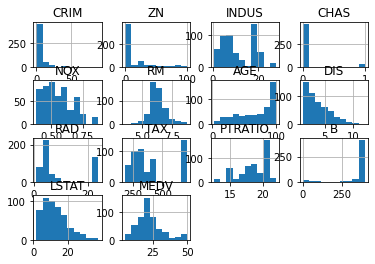

In [6]:
datos.hist()

In [7]:
datos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
##Preparación de los datos
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(datos.drop(columns='MEDV'),
                                                                    datos['MEDV'],
                                                                    train_size=0.7,
                                                                    random_state=123)

In [14]:
modelo = DecisionTreeRegressor(max_depth=3, 
                               random_state=123)

In [15]:
modelo.fit(xEntrenamiento,yEntrenamiento)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del arbol: 3
Número de nodos terminales: 8


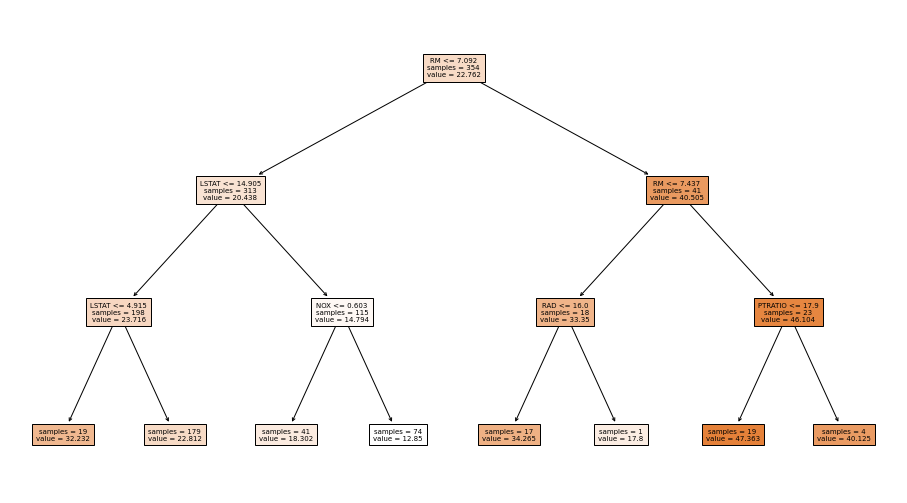

In [18]:
fig,ax=plt.subplots(figsize=(16,9))
print(f"Profundidad del arbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(decision_tree = modelo,
                feature_names = datos.drop(columns='MEDV').columns,
                class_names=datos['MEDV'],
                filled=True,
                impurity=False,
                fontsize=7,
                ax=ax)

In [20]:
##Evaluación del modelo 
predicciones = modelo.predict(xPrueba)
predicciones

array([22.81173184, 22.81173184, 47.36315789, 22.81173184, 32.23157895,
       40.125     , 22.81173184, 12.85      , 18.30243902, 22.81173184,
       22.81173184, 22.81173184, 18.30243902, 22.81173184, 18.30243902,
       22.81173184, 22.81173184, 47.36315789, 18.30243902, 18.30243902,
       12.85      , 22.81173184, 22.81173184, 47.36315789, 32.23157895,
       22.81173184, 12.85      , 22.81173184, 22.81173184, 22.81173184,
       22.81173184, 32.23157895, 22.81173184, 22.81173184, 22.81173184,
       34.26470588, 22.81173184, 12.85      , 18.30243902, 47.36315789,
       22.81173184, 18.30243902, 22.81173184, 47.36315789, 18.30243902,
       22.81173184, 22.81173184, 22.81173184, 18.30243902, 17.8       ,
       32.23157895, 22.81173184, 22.81173184, 12.85      , 22.81173184,
       12.85      , 12.85      , 12.85      , 34.26470588, 12.85      ,
       22.81173184, 22.81173184, 12.85      , 22.81173184, 22.81173184,
       22.81173184, 22.81173184, 22.81173184, 22.81173184, 32.23

In [25]:
#Error cuadrático medio 
rmse = mean_squared_error(y_true = yEntrenamiento,
                         y_pred=modelo.predict(xEntrenamiento),
                         squared=False)
print(f"El error de entrenamiento (RMSE) es: {rmse}")

El error de entrenamiento (RMSE) es: 3.977227445381723


In [27]:
#Error porcentual Entrenamiento 
mape=mean_absolute_percentage_error(y_true=yEntrenamiento,
                                    y_pred=modelo.predict(xEntrenamiento))
print(f"El error de entrenamiento (MAPE) es: {mape}")

El error de entrenamiento (MAPE) es: 0.15724573378739967


In [28]:
#Error cuadrático medio 
rmse = mean_squared_error(y_true = yPrueba,
                         y_pred=modelo.predict(xPrueba),
                         squared=False)
print(f"El error de entrenamiento (RMSE) es: {rmse}")

El error de entrenamiento (RMSE) es: 5.137041625792257


In [29]:
#Error porcentual Entrenamiento 
mape=mean_absolute_percentage_error(y_true=yPrueba,
                                    y_pred=modelo.predict(xPrueba))
print(f"El error de entrenamiento (MAPE) es: {mape}")

El error de entrenamiento (MAPE) es: 0.17881278036617645
